<a href="https://colab.research.google.com/github/ekaratnida/Applied-machine-learning/blob/master/Week05-Logistic/Logistic_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

# Logistic Regression

In [1]:
from sklearn.datasets import make_classification
import numpy as np
np.random.seed(42)

# Sigmoid function

In [2]:
def sigmoid(z):
    """ sigmoid """
    return 1 / (1 + np.exp(-z))

# Cost function (NLLLoss)


In [3]:
def cost(x, y, theta):
    m = x.shape[0]
    h = sigmoid(np.matmul(x, theta))
    #print("h = ",h)
    cost = -1* (1/m)*(np.matmul(-y.T, np.log(h)) + np.matmul((1 -y.T), np.log(1 - h)))
    return cost

# Gradient descent

In [4]:
def gradient_Descent(theta, alpha, x , y):
    m = x.shape[0]
    h = sigmoid(theta.T.dot(x.T))
    error = h-y
    grad = x.T.dot(error.T)
    theta = theta - (alpha * grad)/m
    return theta

# Training model

In [5]:
X, Y = make_classification(n_samples=10, n_features=4, random_state=123)

print(X)
print(Y)

[[-0.52503756 -0.89111891 -1.7132207   1.3151324 ]
 [ 0.35066574  0.78060054  1.89223867 -1.45339535]
 [-0.12831709 -0.40891671 -1.18968556  0.91411514]
 [ 1.42225579  1.03146683 -0.93564326  0.72451256]
 [-1.04364535 -1.32230348 -1.59420328  1.22173116]
 [ 0.79417498  0.9352515   0.92684339 -0.70960581]
 [-0.7732662  -0.35368578  1.34414743 -1.03617157]
 [-0.99234076 -0.86045595  0.08495255 -0.06895361]
 [-0.1522535   0.41174991  2.20648133 -1.69682095]
 [-1.54309852 -1.47087305 -0.40381336  0.30476851]]
[0 1 0 0 0 1 1 1 1 0]


In [6]:
X_b = np.c_[np.ones((X.shape[0],1)),X]
print(X_b)

[[ 1.         -0.52503756 -0.89111891 -1.7132207   1.3151324 ]
 [ 1.          0.35066574  0.78060054  1.89223867 -1.45339535]
 [ 1.         -0.12831709 -0.40891671 -1.18968556  0.91411514]
 [ 1.          1.42225579  1.03146683 -0.93564326  0.72451256]
 [ 1.         -1.04364535 -1.32230348 -1.59420328  1.22173116]
 [ 1.          0.79417498  0.9352515   0.92684339 -0.70960581]
 [ 1.         -0.7732662  -0.35368578  1.34414743 -1.03617157]
 [ 1.         -0.99234076 -0.86045595  0.08495255 -0.06895361]
 [ 1.         -0.1522535   0.41174991  2.20648133 -1.69682095]
 [ 1.         -1.54309852 -1.47087305 -0.40381336  0.30476851]]


In [7]:
n_iterations = 100
learning_rate = 0.01

#init
Theta = np.random.random((X_b.shape[1],1))
print("Theta = ",Theta)


Theta =  [[0.37454012]
 [0.95071431]
 [0.73199394]
 [0.59865848]
 [0.15601864]]


In [8]:
for i in range(n_iterations):
    Theta = gradient_Descent(Theta, learning_rate, X_b, Y)
    if i % 10 == 0:
      print(i, "Cost = ", cost(X_b, Y, Theta))
      #print("Theta = ", Theta)

h = sigmoid(Theta.T.dot(X_b.T))
print("h = ",h)
binary_array = (h > .5).astype(int)
# Step 2: Convert the NumPy array to a list of lists
h_list = binary_array.tolist()

print("Y = ",Y.tolist())
print("h = ",h_list[0])

from sklearn.metrics import accuracy_score
print(f"accuracy = {accuracy_score(Y,h_list[0]) * 100} %")

0 Cost =  [0.04485684]
10 Cost =  [0.04378645]
20 Cost =  [0.04253926]
30 Cost =  [0.04114974]
40 Cost =  [0.03964766]
50 Cost =  [0.03805878]
60 Cost =  [0.03640537]
70 Cost =  [0.03470672]
80 Cost =  [0.03297952]
90 Cost =  [0.03123814]
h =  [[0.10618824 0.94422843 0.25910406 0.7832192  0.06316274 0.91723949
  0.67999375 0.29679826 0.92335368 0.10802069]]
Y =  [0, 1, 0, 0, 0, 1, 1, 1, 1, 0]
h =  [0, 1, 0, 1, 0, 1, 1, 0, 1, 0]
accuracy = 80.0 %


# SKLearn

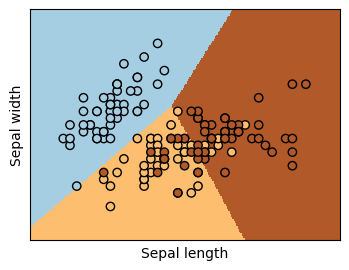

In [9]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = LogisticRegression()

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

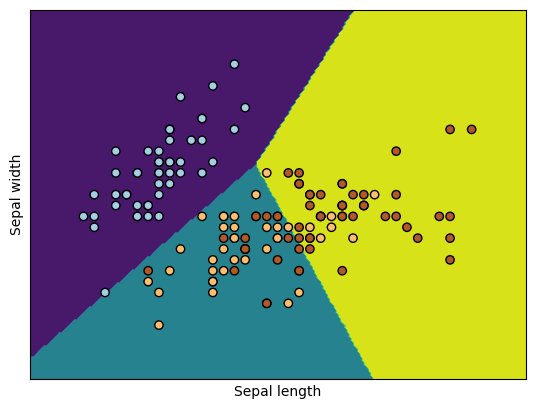

In [10]:
from sklearn.inspection import DecisionBoundaryDisplay
display = DecisionBoundaryDisplay(
    xx0=xx, xx1=yy, response=Z
)
display.plot()

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()